In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joypy

In [22]:
# Cargar el dataset de temperatura de ciudades
temperature_data = pd.read_csv("city_temperature.csv")
temperature_data

/var/folders/v4/74xgv0954936fxrjdx6yw9380000gp/T/ipykernel_87655/3602052765.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temperature_data = pd.read_csv("city_temperature.csv")


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [23]:
# Mostrar lista con los paises en el dataset
unique_countries = temperature_data["Country"].unique()
unique_countries

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

In [24]:
# Mostrar lista con las regiones en el dataset
unique_region = temperature_data["Region"].unique()
unique_region

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [32]:
# Limpieza y preparación del dataset

# Encontrar filas con valores inválidos
invalid_rows = temperature_data[
    (temperature_data["Month"] < 1) | (temperature_data["Month"] > 12) |
    (temperature_data["Day"] < 1) | (temperature_data["Day"] > 31)]

invalid_rows

,Region,Country,State,City,Month,Day,Year,AvgTemperature
82774,Africa,Guinea,NaN,Conakry,3,0,2008,-99.0
85697,Africa,Guinea,NaN,Conakry,3,0,2016,-99.0
92041,Africa,Guinea-Bissau,NaN,Bissau,3,0,2008,-99.0
146077,Africa,Malawi,NaN,Lilongwe,3,0,2012,-99.0
177862,Africa,Nigeria,NaN,Lagos,3,0,2008,-99.0
241159,Africa,Uganda,NaN,Kampala,3,0,2012,-99.0
1209901,North America,Mexico,NaN,Guadalajara,3,0,2012,-99.0
1333910,South/Central America & Carribean,Cuba,NaN,Havana,3,0,2008,-99.0


In [33]:
# Eliminar filas con valores inválidos para "Day"
temperature_data_clean = temperature_data[
    (temperature_data["Day"] > 0) & (temperature_data["Day"] <= 31)]

In [34]:
# Convertir a datetime nuevamente
temperature_data_clean["Date"] = pd.to_datetime(
    temperature_data_clean[["Year", "Month", "Day"]], errors='coerce'
)

# Verificar si hay fechas NaT (no convertidas)
print("Fechas que no pudieron ser convertidas:")
print(temperature_data_clean[temperature_data_clean["Date"].isna()])

Fechas que no pudieron ser convertidas:
                Region   Country State         City  Month  Day  Year  \
58178           Africa  Ethiopia   NaN  Addis Ababa     12    3   201   
58179           Africa  Ethiopia   NaN  Addis Ababa     12    4   201   
58180           Africa  Ethiopia   NaN  Addis Ababa     12    5   201   
58181           Africa  Ethiopia   NaN  Addis Ababa     12    6   201   
58182           Africa  Ethiopia   NaN  Addis Ababa     12    7   201   
...                ...       ...   ...          ...    ...  ...   ...   
1212427  North America    Mexico   NaN  Guadalajara     12   27   201   
1212428  North America    Mexico   NaN  Guadalajara     12   28   201   
1212429  North America    Mexico   NaN  Guadalajara     12   29   201   
1212430  North America    Mexico   NaN  Guadalajara     12   30   201   
1212431  North America    Mexico   NaN  Guadalajara     12   31   201   

         AvgTemperature Date  
58178             -99.0  NaT  
58179             -99

/var/folders/v4/74xgv0954936fxrjdx6yw9380000gp/T/ipykernel_87655/2550390593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data_clean["Date"] = pd.to_datetime(


In [35]:
# Eliminar filas con años incompletos o temperaturas negativas
temperature_data_clean = temperature_data_clean[
    temperature_data_clean["Year"] > 1900  # Años válidos
]

# Eliminar filas con temperaturas negativas, excepto por valores válidos de -99 (pueden ser valores de error)
temperature_data_clean = temperature_data_clean[
    temperature_data_clean["AvgTemperature"] >= -50
]

# Convertir a datetime
temperature_data_clean["Date"] = pd.to_datetime(
    temperature_data_clean[["Year", "Month", "Day"]],
    errors='coerce', 
    format="%Y-%m-%d")

# Verificar fechas NaT
print("Fechas que no pudieron ser convertidas después de la limpieza:")
print(temperature_data_clean[temperature_data_clean["Date"].isna()])

Fechas que no pudieron ser convertidas después de la limpieza:
Empty DataFrame
Columns: [Region, Country, State, City, Month, Day, Year, AvgTemperature, Date]
Index: []


In [36]:
# Asegurar que la fecha esté correctamente formateada
temperature_data["Date"] = pd.to_datetime(
    temperature_data[["Year", "Month", "Day"]],
    errors='coerce')

# Filtrar por algunas regiones importantes
selected_regions = [
    "Africa", "Asia", "Australia/South Pacific", "Europe", "Middle East",
    "North America", "South/Central America & Carribean"]

temperature_data = temperature_data[temperature_data["Region"].isin(selected_regions)]

<Figure size 1200x800 with 0 Axes>

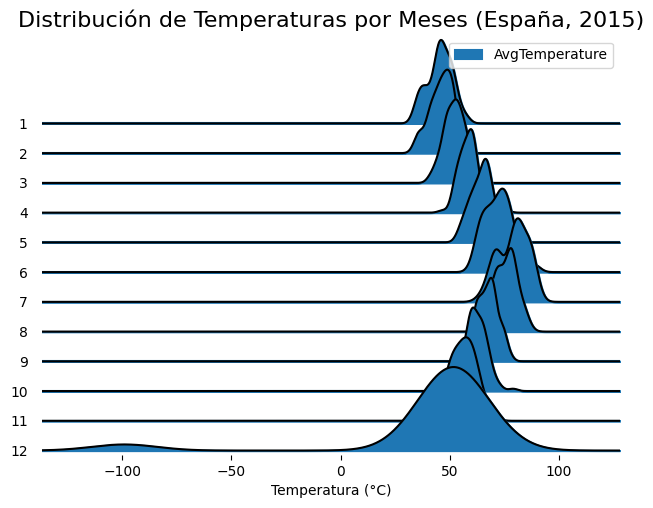

In [37]:
spain_data_2015 = temperature_data[
    (temperature_data["Country"] == "Spain") & (temperature_data["Year"] == 2015)]

# Crear un ridgeline chart para España en 2015
plt.figure(figsize=(12, 8))
joypy.joyplot(
    spain_data_2015,
    by="Month",
    column="AvgTemperature",
    ylim='own',
    kind='kde',
    fill=True,
    legend=True,
    linewidth=1.5)

plt.title("Distribución de Temperaturas por Meses (España, 2015)", fontsize=16)
plt.xlabel("Temperatura (°C)")

# Guardar la imagen en carpeta local
ruta = "imagenes/joyplot_Temperatura_ES2015.png"
plt.savefig(ruta)

plt.show()

<Figure size 1200x800 with 0 Axes>

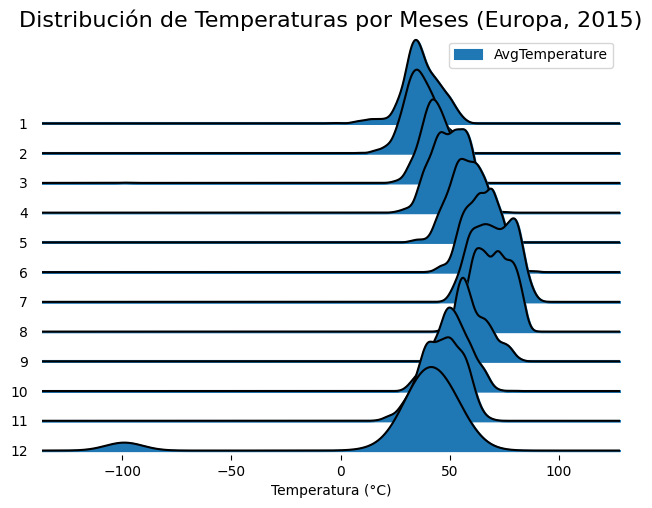

In [38]:
# Filtrar datos para Europa y un año específico, por ejemplo, 2015
europe_data_2015 = temperature_data[
    (temperature_data["Region"] == "Europe") & (temperature_data["Year"] == 2015)]

# Crear un ridgeline chart para Europa en 2015
plt.figure(figsize=(12, 8))
joypy.joyplot(
    europe_data_2015,
    by="Month",
    column="AvgTemperature",
    ylim='own',
    kind='kde',
    fill=True,
    legend=True,
    linewidth=1.5)

plt.title("Distribución de Temperaturas por Meses (Europa, 2015)", fontsize=16)
plt.xlabel("Temperatura (°C)")

# Guardar la imagen en carpeta local
ruta = "imagenes/joyplot_Temperatura_EU2015.png"
plt.savefig(ruta)

plt.show()

<Figure size 1200x800 with 0 Axes>

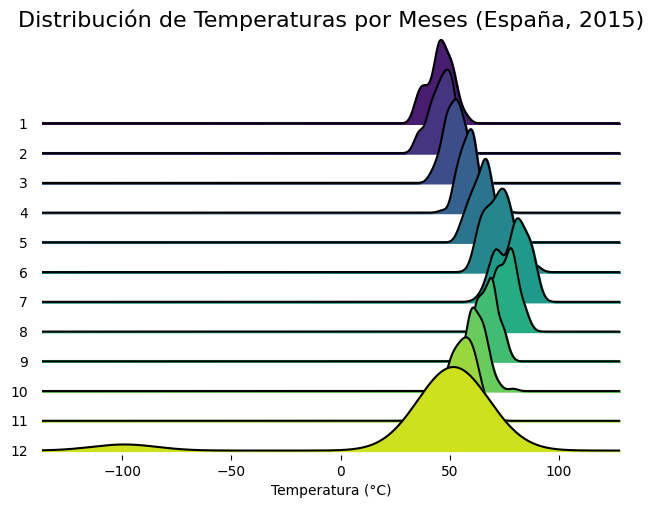

In [39]:
# Filtrar datos para España y un año específico 2015
spain_data_2015 = temperature_data[
    (temperature_data["Country"] == "Spain") & (temperature_data["Year"] == 2015)]

# Calcular la temperatura media por mes
monthly_avg_temp = spain_data_2015.groupby("Month")["AvgTemperature"].mean().sort_index()

# Seleccionar una paleta de colores para 12 meses
color_palette = sns.color_palette("viridis", n_colors=12)  

# Crear el ridgeline chart
plt.figure(figsize=(12, 8))
joypy.joyplot(
    spain_data_2015,
    by="Month",
    column="AvgTemperature",
    ylim='own',
    kind='kde',
    fill=True,
    linewidth=1.5,
    color=color_palette)

plt.title("Distribución de Temperaturas por Meses (España, 2015)", fontsize=16)
plt.xlabel("Temperatura (°C)")

# Guardar la imagen en carpeta local
ruta = "imagenes/joyplot_Temperature_ES2015.png"
plt.savefig(ruta)

plt.show()

<Figure size 1200x800 with 0 Axes>

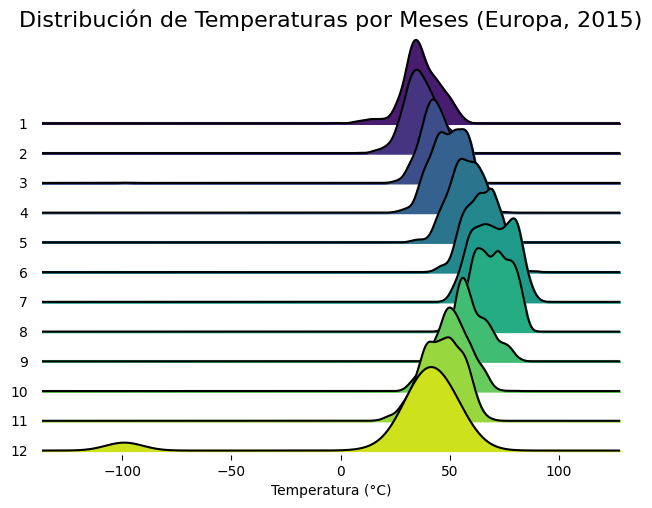

In [40]:
# Filtrar datos para la región Europa en 2015
europe_data_2015 = temperature_data[
    (temperature_data["Region"] == "Europe") & (temperature_data["Year"] == 2015)]

# Calcular la temperatura media por mes para la región Europa
monthly_avg_temp = europe_data_2015.groupby("Month")["AvgTemperature"].mean().sort_index()

# Seleccionar paleta de colores apra 12 meses
color_palette = sns.color_palette("viridis", n_colors=12)

# Crear el ridgeline chart
plt.figure(figsize=(12, 8))
joypy.joyplot(
    europe_data_2015,
    by="Month",
    column="AvgTemperature",
    ylim='own',
    kind='kde',
    fill=True,
    linewidth=1.5,
    color=color_palette)

plt.title("Distribución de Temperaturas por Meses (Europa, 2015)", fontsize=16)
plt.xlabel("Temperatura (°C)")

# Guardar la imagen en carpeta local
ruta = "imagenes/joyplot_Temperature_EU2015.png"
plt.savefig(ruta)

plt.show()